In [50]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [51]:
train = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Healthy%20Lifestyle%20Cities%20Report%202021/healthy_lifestyle_city_2021.csv")

In [52]:
train.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [53]:
train['Cost of a bottle of water(City)'] = train['Cost of a bottle of water(City)'].replace(to_replace ='£', value = '', regex = True)
train['Obesity levels(Country)'] = train['Obesity levels(Country)'].replace(to_replace ='%', value = '', regex = True)
train['Cost of a monthly gym membership(City)'] = train['Cost of a monthly gym membership(City)'].replace(to_replace ='£', value = '', regex = True)
train=train.drop(['Rank'],axis=1)
train = train.replace('-', np.nan)
train['Sunshine hours(City)']=train['Sunshine hours(City)'].map(float)
train['Cost of a bottle of water(City)']=train['Cost of a bottle of water(City)'].map(float)
train['Obesity levels(Country)']=train['Obesity levels(Country)'].map(float)
train['Pollution(Index score) (City)']=train['Pollution(Index score) (City)'].map(float)
train['Annual avg. hours worked']=train['Annual avg. hours worked'].map(float)
train['Cost of a monthly gym membership(City)']=train['Cost of a monthly gym membership(City)'].map(float)
train['Annual avg. hours worked'].unique()

array([1434., 1712., 1501., 1452., 1380., 1540., 1644., 1386., 1686.,
       1670.,   nan, 1967., 1557., 1898., 1832., 1779., 1772., 1583.,
       1505., 1538., 1718., 1965., 2137.])

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Sunshine hours(City)                    43 non-null     float64
 2   Cost of a bottle of water(City)         44 non-null     float64
 3   Obesity levels(Country)                 44 non-null     float64
 4   Life expectancy(years) (Country)        44 non-null     float64
 5   Pollution(Index score) (City)           43 non-null     float64
 6   Annual avg. hours worked                33 non-null     float64
 7   Happiness levels(Country)               44 non-null     float64
 8   Outdoor activities(City)                44 non-null     int64  
 9   Number of take out places(City)         44 non-null     int64  
 10  Cost of a monthly gym membership(City)  44 non-null     float64


In [55]:
train.isnull().sum()

City                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

In [56]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunshine hours(City),43.0,2245.860465,567.403719,1405.00,1798.500,2066.000,2629.000,3542.00
Cost of a bottle of water(City),44.0,1.173409,0.718642,0.15,0.570,1.195,1.600,3.20
Obesity levels(Country),44.0,21.925000,10.195670,3.90,19.500,22.300,29.000,36.20
Life expectancy(years) (Country),44.0,78.175000,5.304370,56.30,75.400,80.400,81.800,83.20
Pollution(Index score) (City),43.0,51.122326,21.856190,13.08,34.355,52.640,66.630,91.74
Annual avg. hours worked,33.0,1672.909091,179.626933,1380.00,1540.000,1686.000,1779.000,2137.00
Happiness levels(Country),44.0,6.435000,0.991202,3.57,5.870,6.900,7.175,7.80
Outdoor activities(City),44.0,213.977273,127.190297,23.00,125.250,189.500,288.250,585.00
Number of take out places(City),44.0,1443.113636,1388.803270,250.00,548.000,998.000,1674.250,6417.00
Cost of a monthly gym membership(City),44.0,40.420000,15.006457,16.07,31.310,37.330,47.210,73.11


In [58]:
train.columns

Index(['City', 'Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

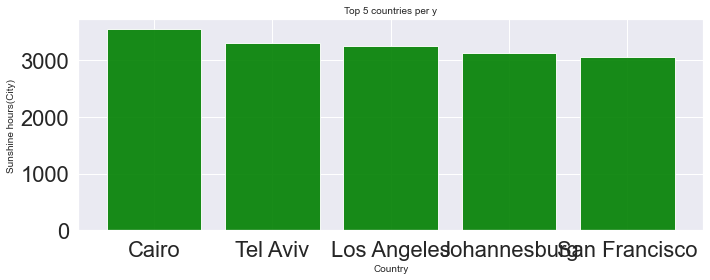

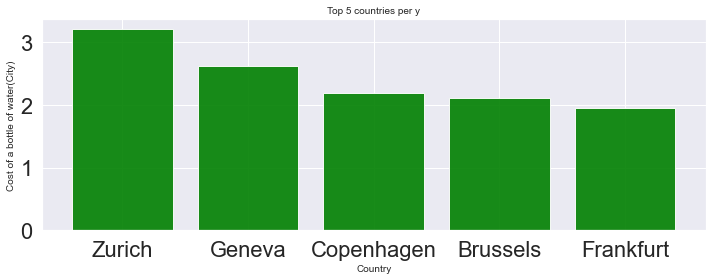

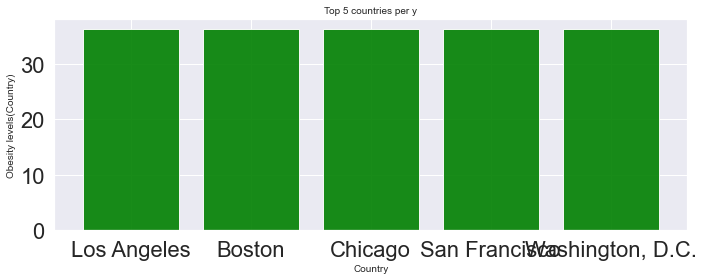

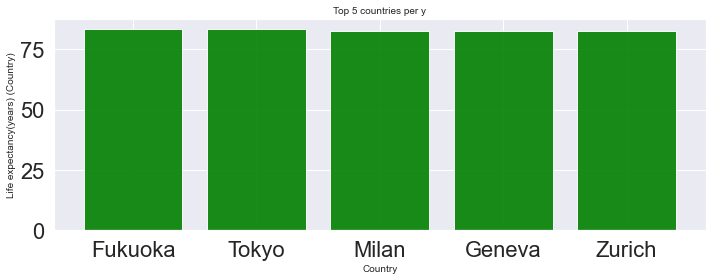

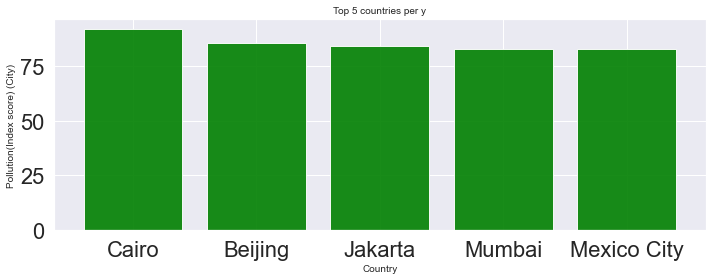

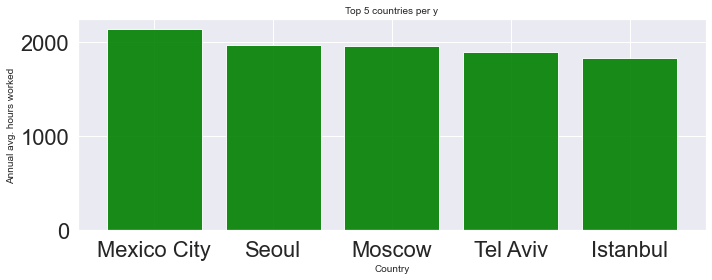

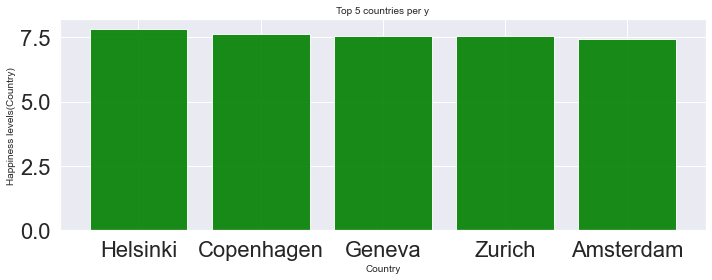

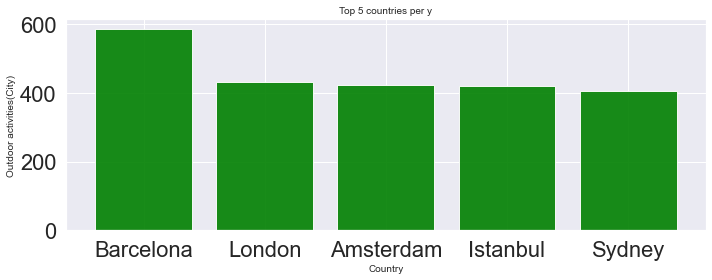

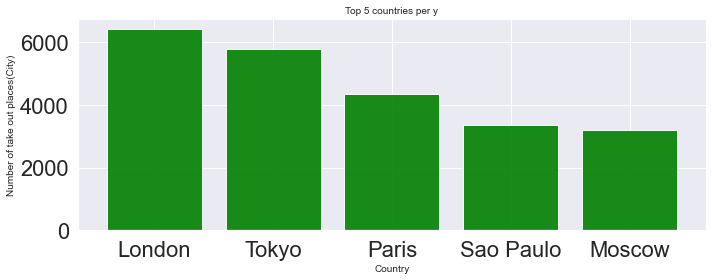

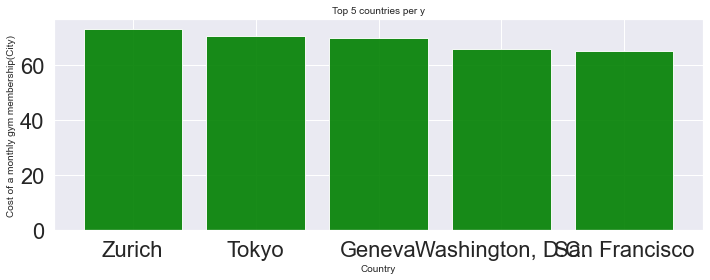

In [59]:
columns=['Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)']
for column in columns:
  top10 = train.nlargest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['City'], top10[column],color='green',alpha=0.9)
  plt.ylabel(column, fontsize = 10)
  plt.xlabel("Country", fontsize = 10)
  plt.title("Top 5 countries per y", fontsize = 10)

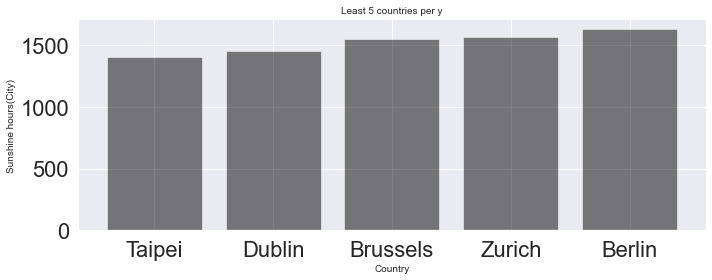

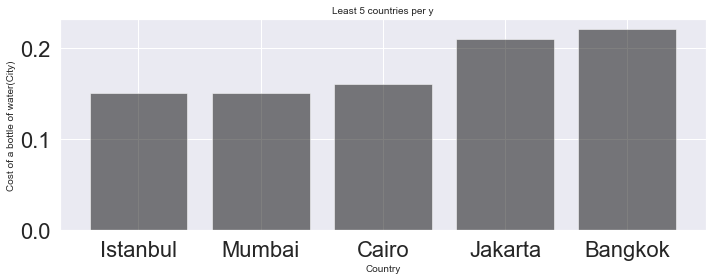

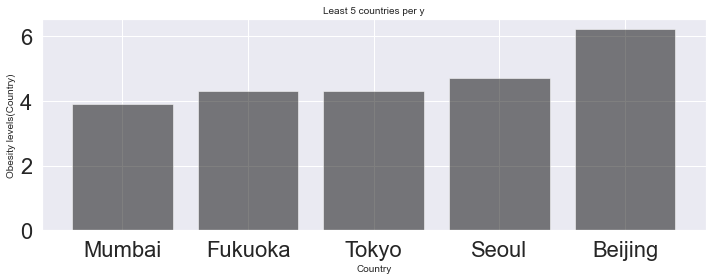

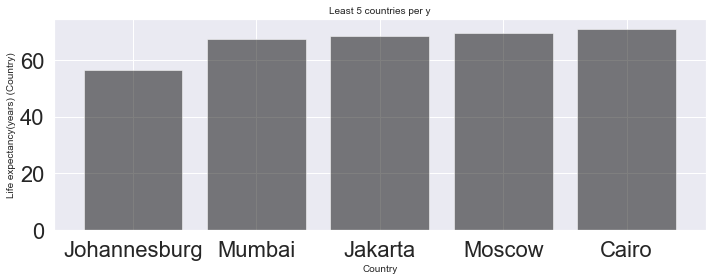

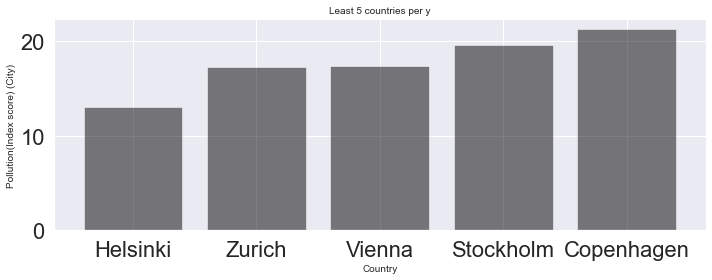

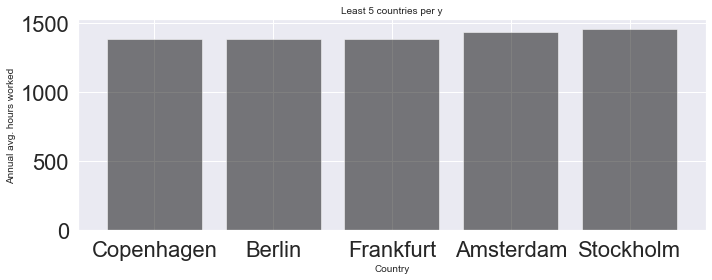

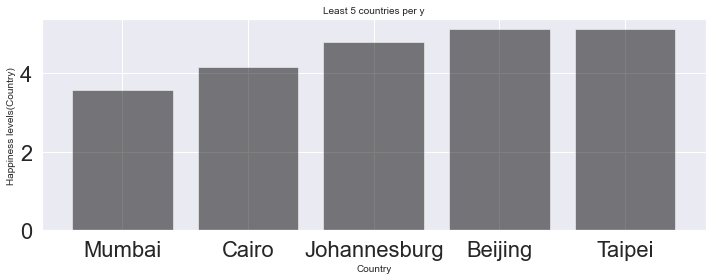

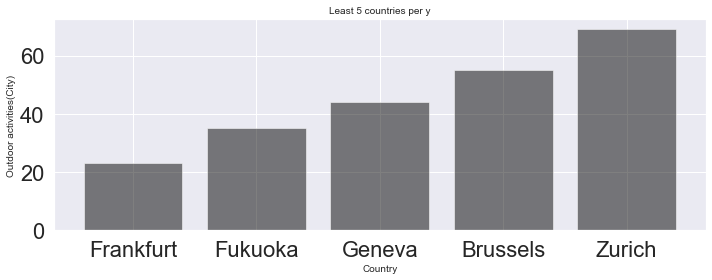

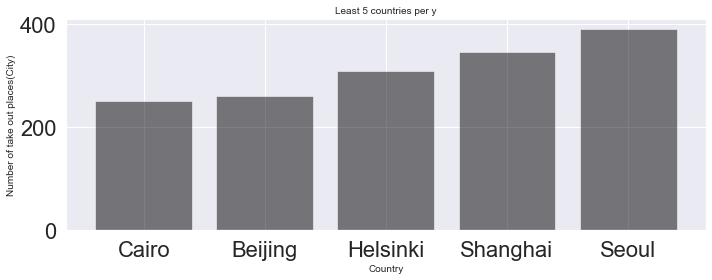

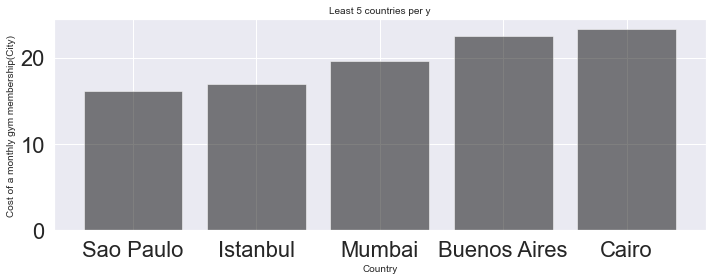

In [60]:
for column in columns:
  top10 = train.nsmallest(5,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['City'], top10[column],color='black',alpha=0.5)
  plt.ylabel(column, fontsize = 10)
  plt.xlabel("Country", fontsize = 10)
  plt.title("Least 5 countries per y", fontsize = 10)

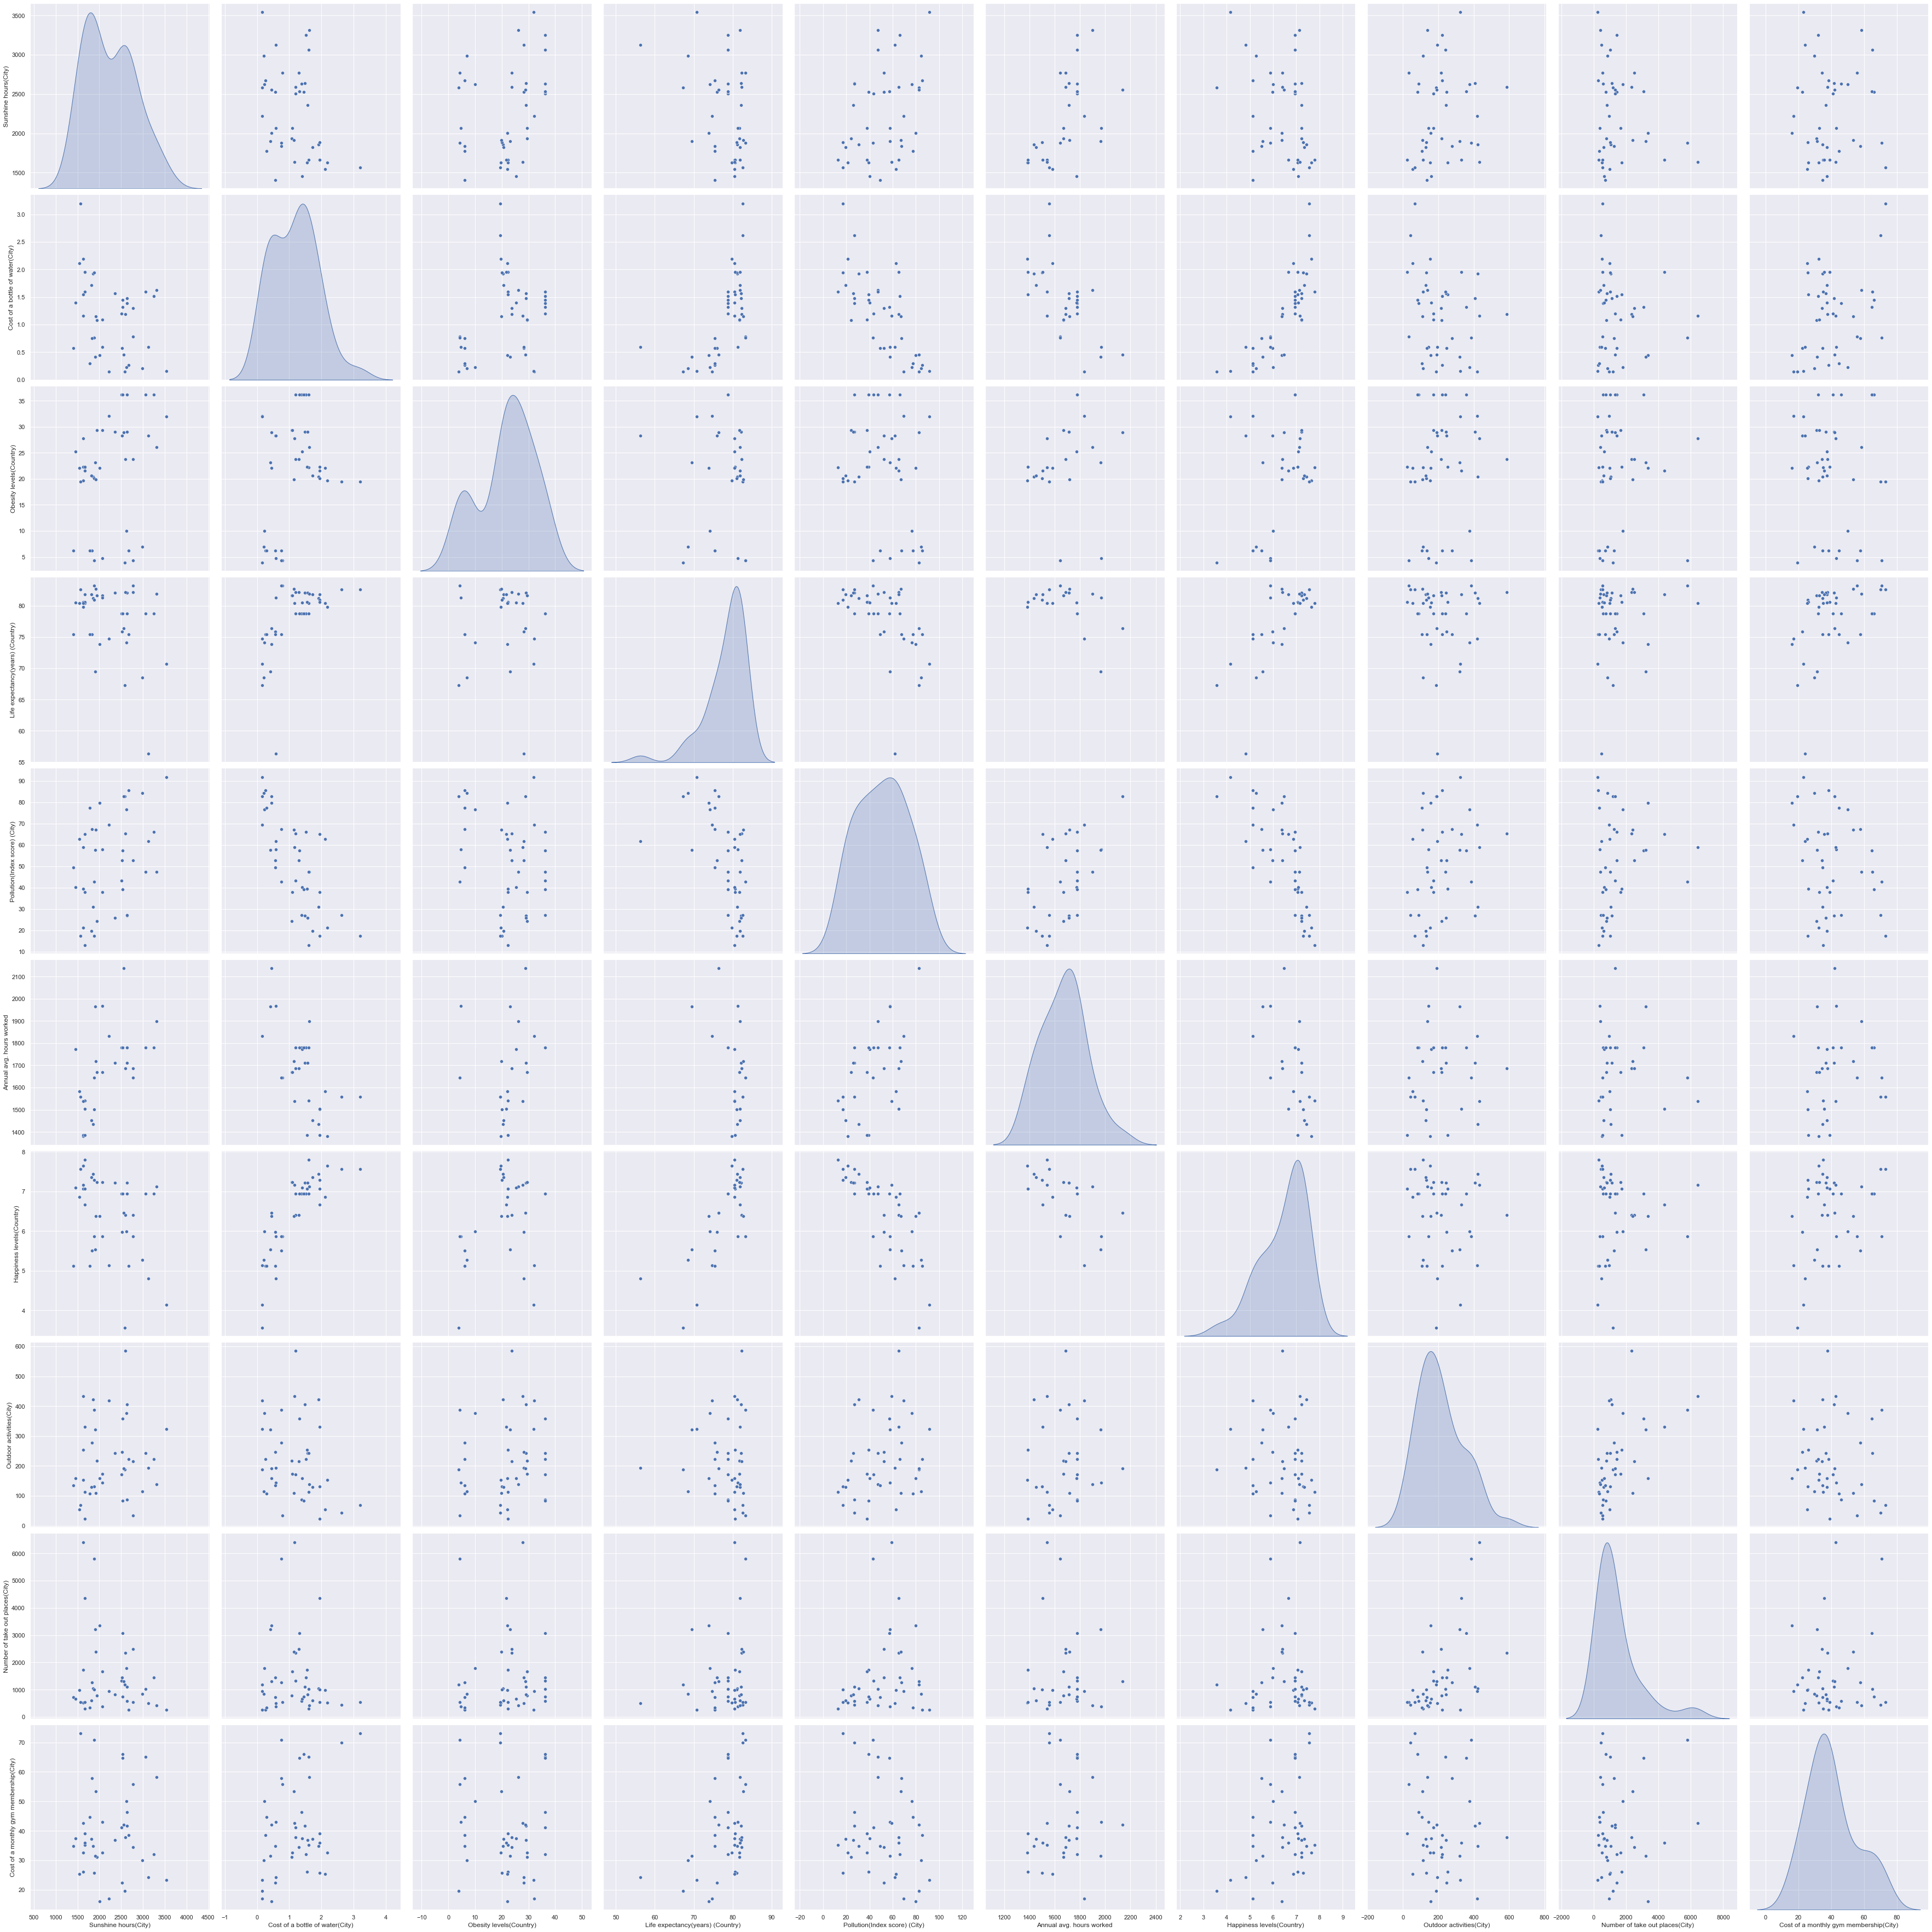

In [61]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

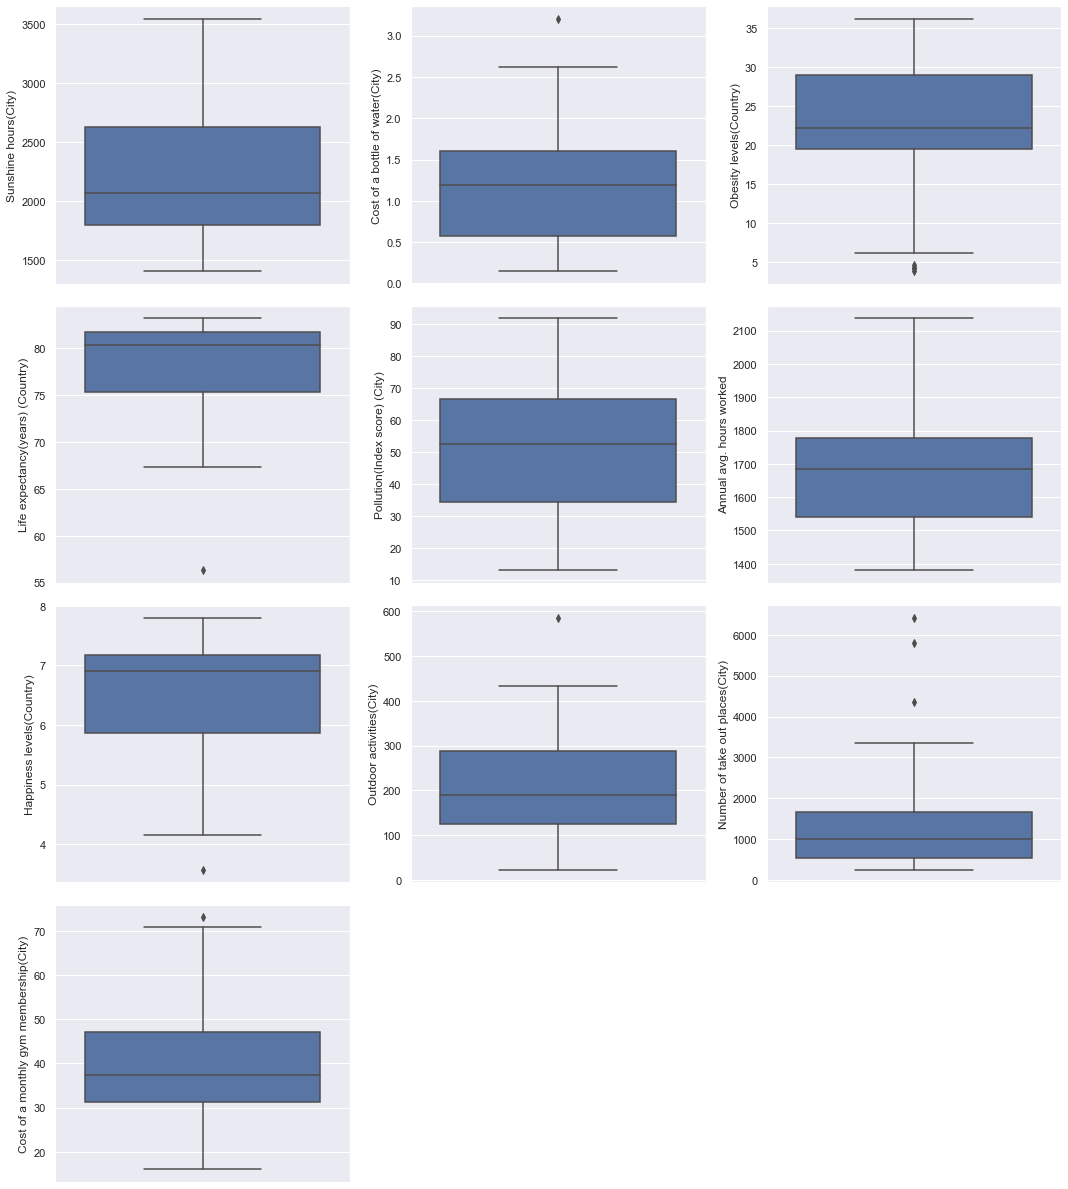

In [62]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1

In [63]:
Asia=train.loc[[6,11,12,16,17,23,28,30,31]]
Asia

,City,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
6,Fukuoka,2769.0,0.78,4.3,83.2,NaN,1644.0,5.87,35,539,55.87
11,Beijing,2671.0,0.26,6.2,75.4,85.43,NaN,5.12,223,261,38.62
12,Bangkok,2624.0,0.22,10.0,74.1,76.64,NaN,5.99,377,1796,50.03
16,Jakarta,2983.0,0.21,6.9,68.5,84.39,NaN,5.28,114,833,29.94
17,Seoul,2066.0,0.59,4.7,81.3,57.82,1967.0,5.87,144,389,43.03
23,Taipei,1405.0,0.57,6.2,75.4,49.32,NaN,5.12,134,717,34.76
28,Tokyo,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387,5802,70.82
30,Hong Kong,1836.0,0.75,6.2,75.4,67.46,NaN,5.51,277,1257,57.95
31,Shanghai,1776.0,0.29,6.2,75.4,77.40,NaN,5.12,108,346,44.68


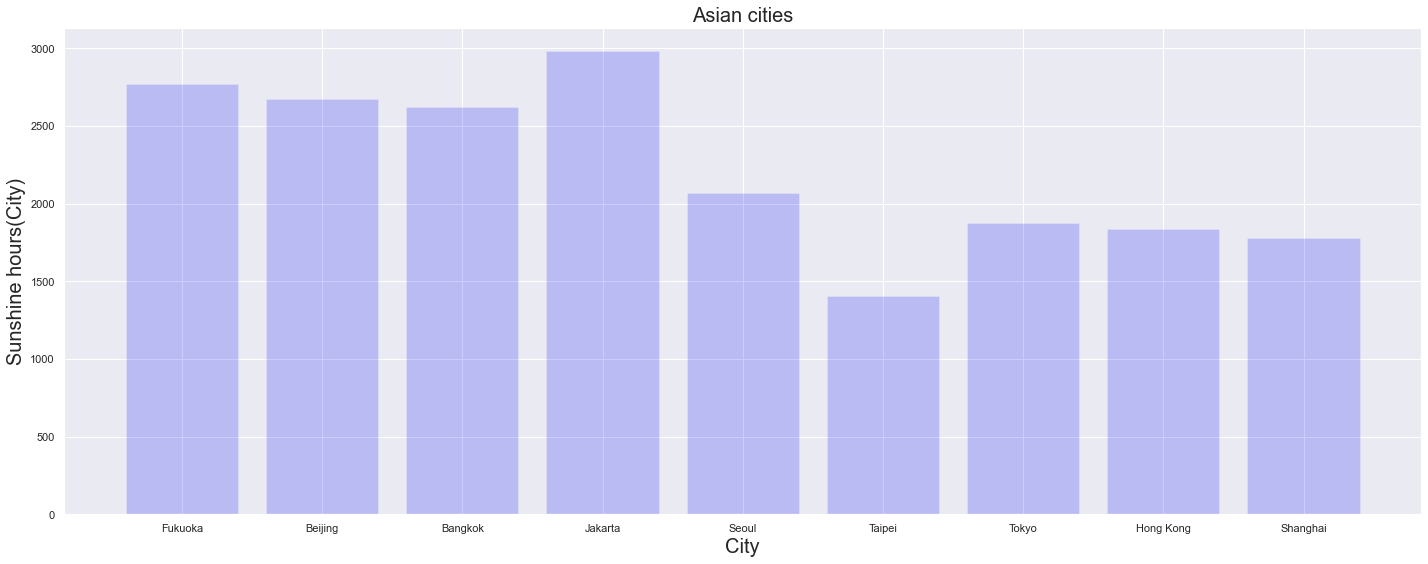

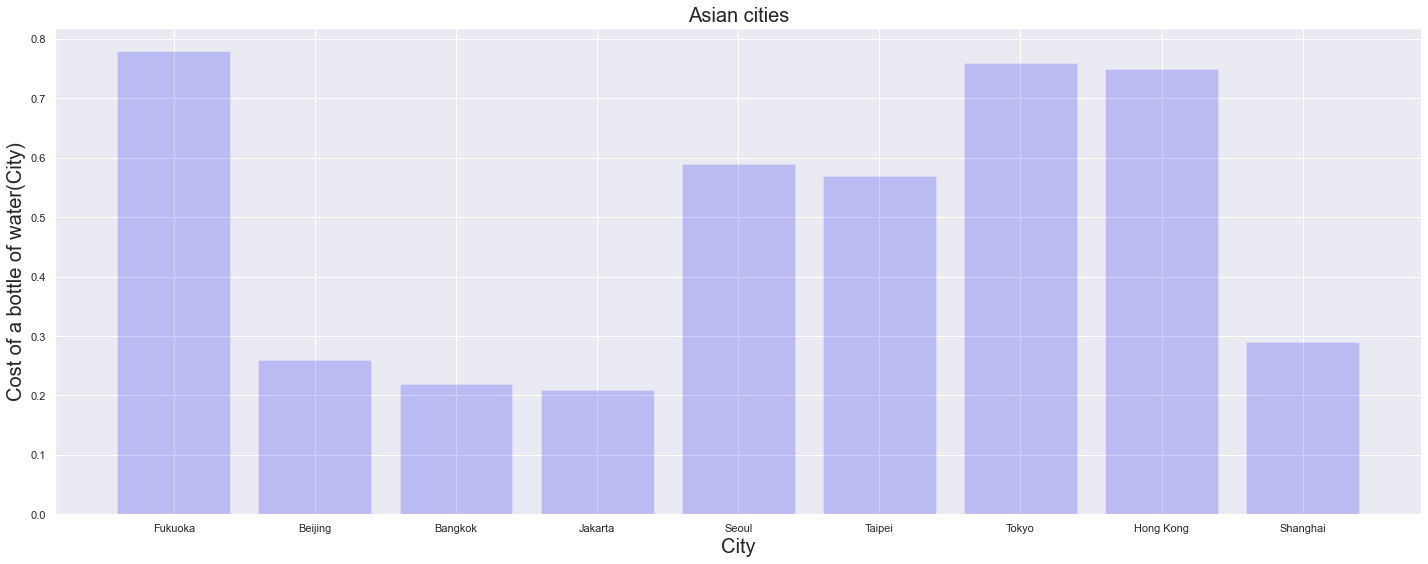

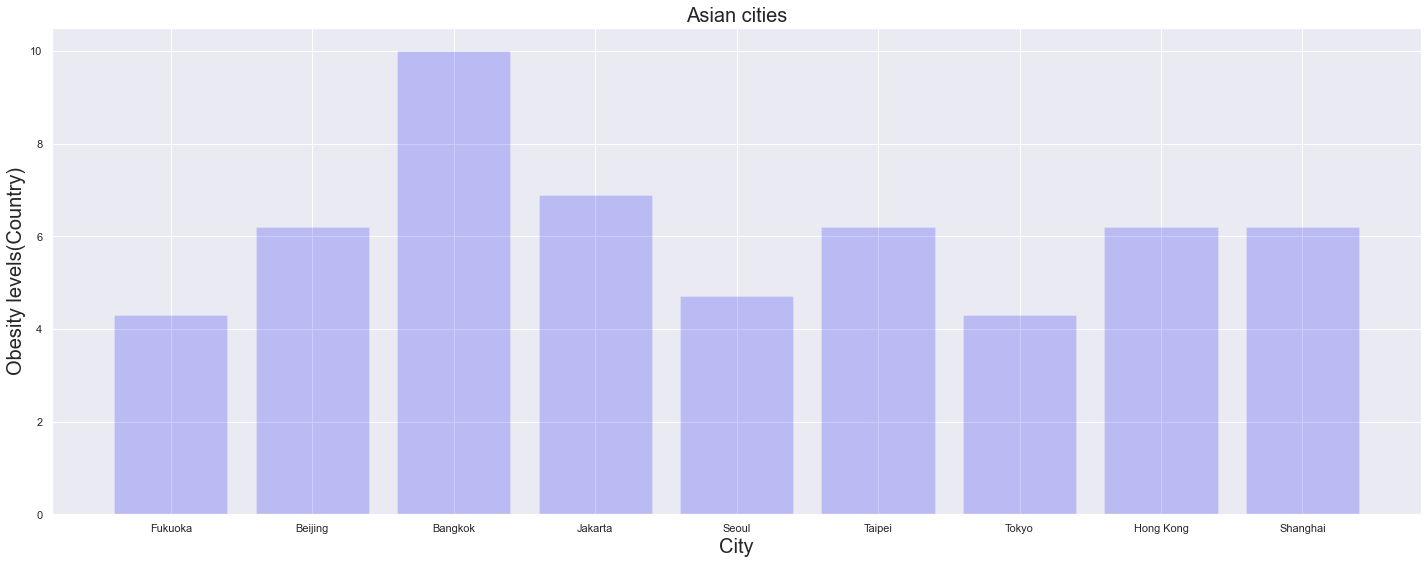

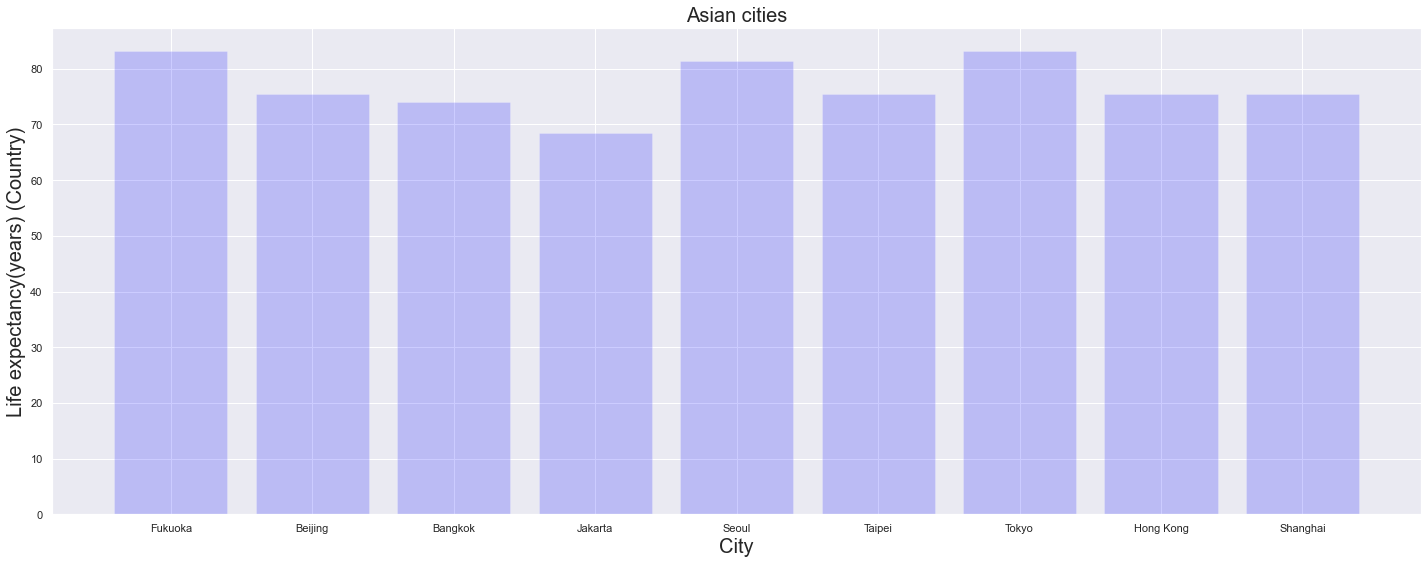

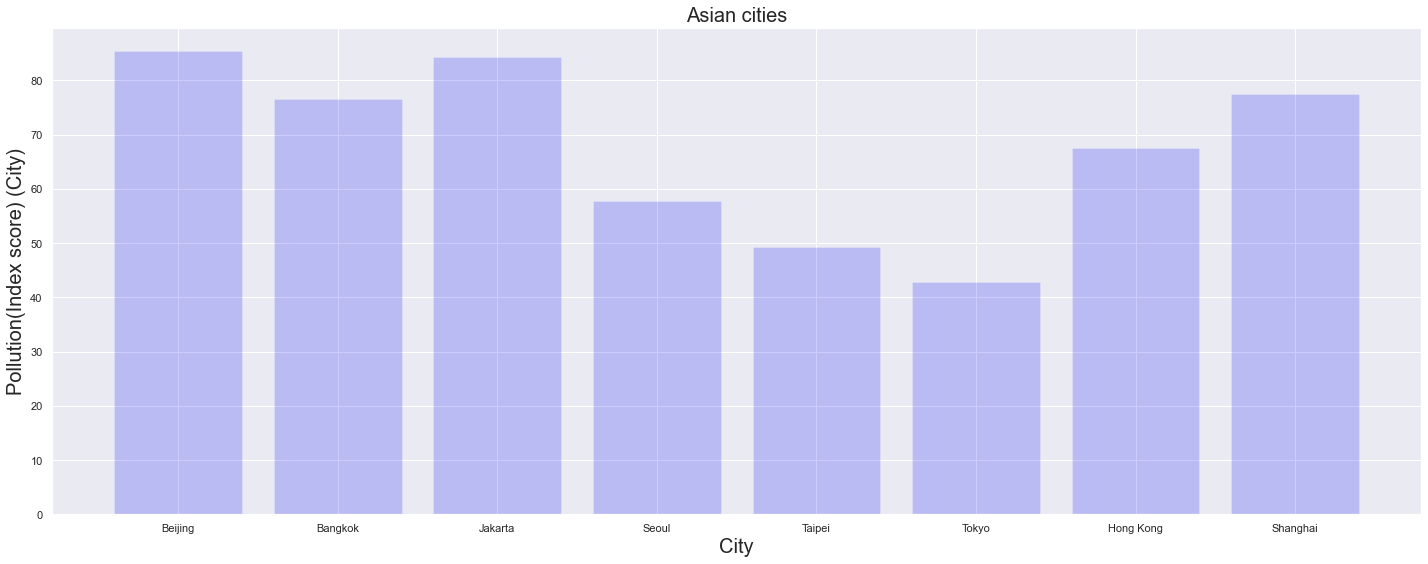

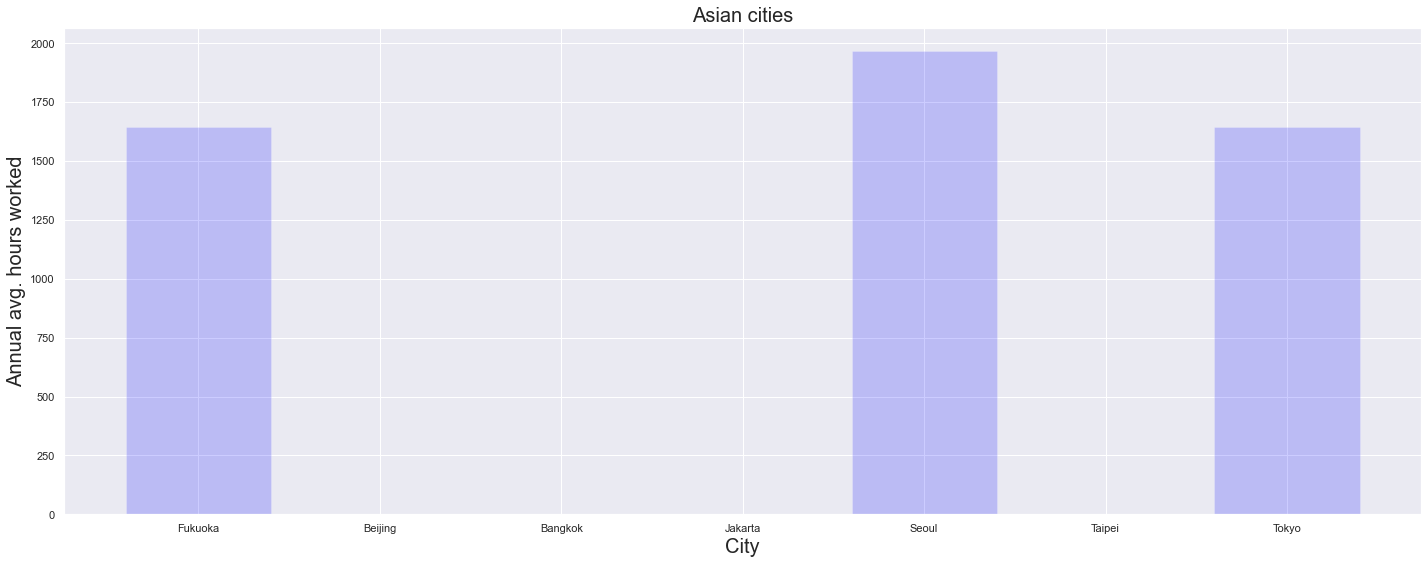

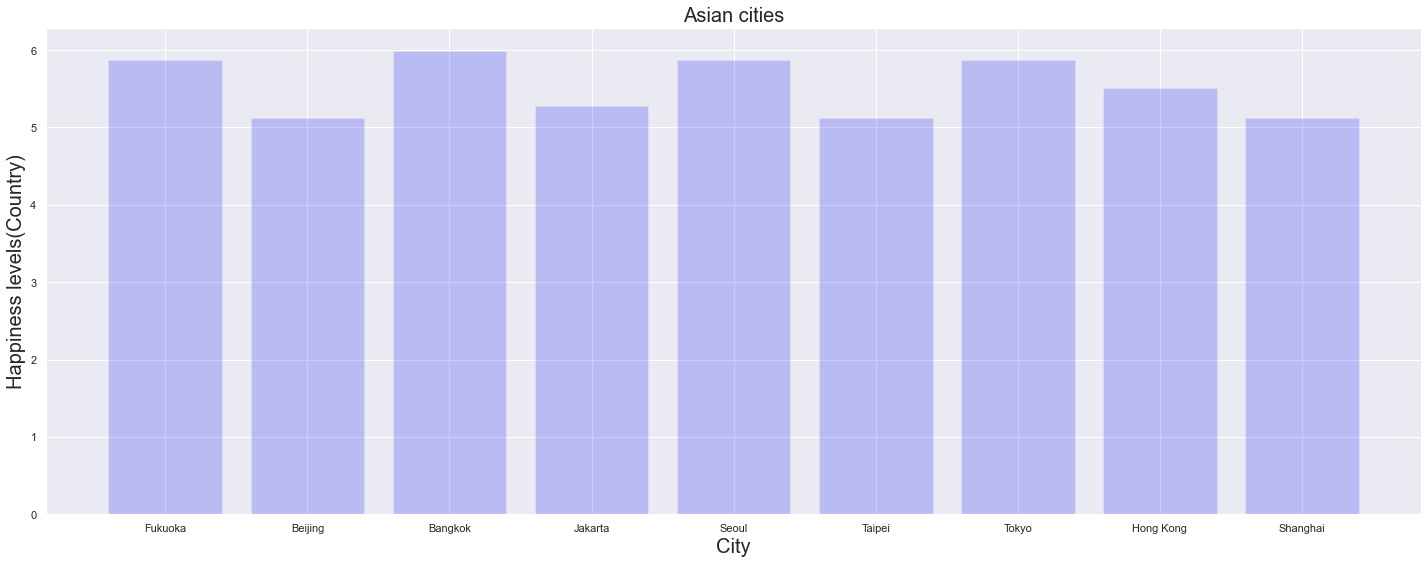

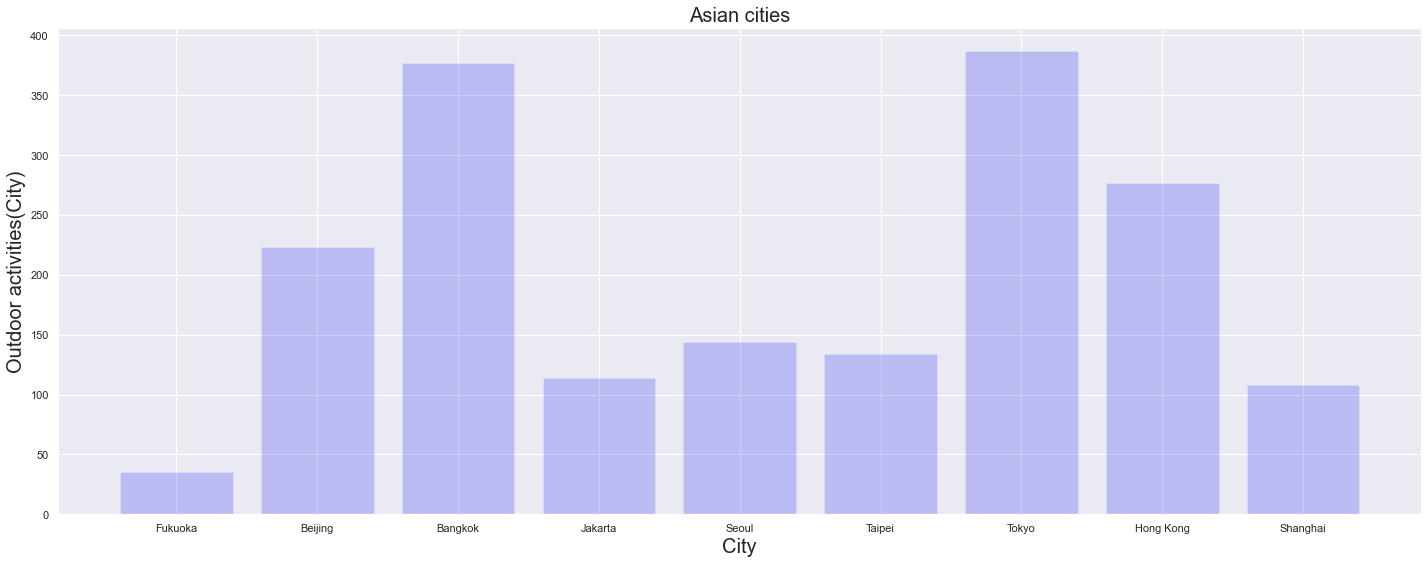

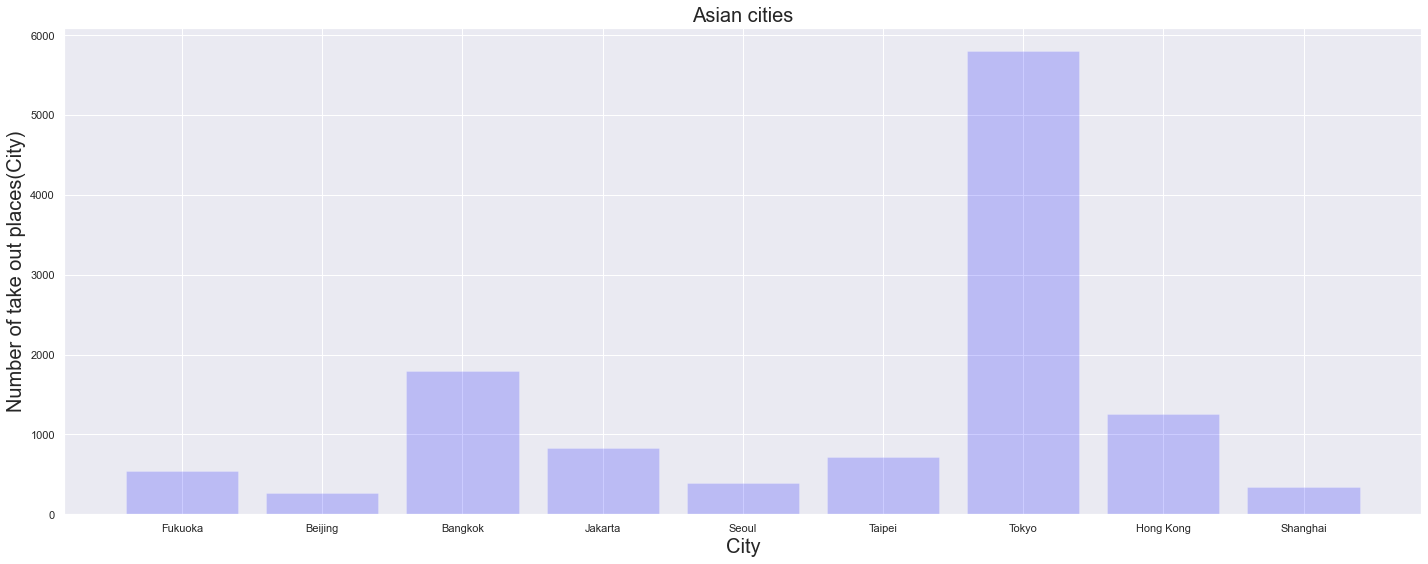

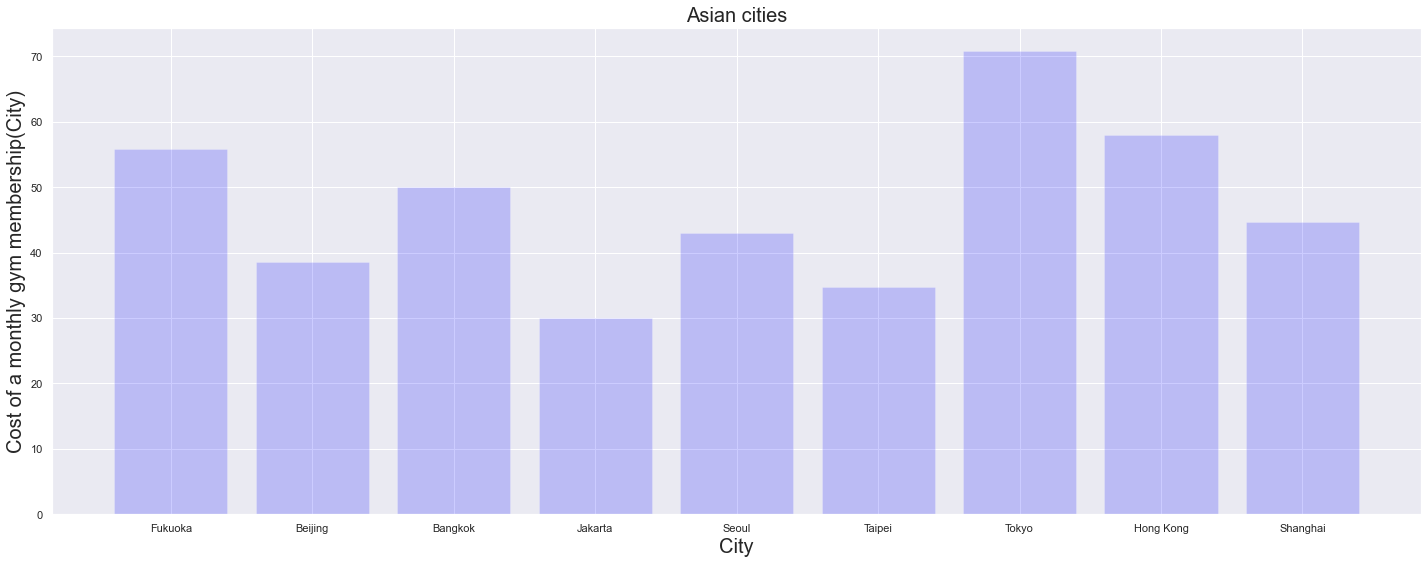

In [64]:
for column in columns:
  plt.figure(figsize=(20,8))
  plt.bar(Asia['City'], Asia[column],color='blue',alpha=0.2)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("City", fontsize = 20)
  plt.title("Asian cities", fontsize = 20)

In [65]:
train=train.set_index('City')
train.columns

Index(['Sunshine hours(City)', 'Cost of a bottle of water(City)',
       'Obesity levels(Country)', 'Life expectancy(years) (Country)',
       'Pollution(Index score) (City)', 'Annual avg. hours worked',
       'Happiness levels(Country)', 'Outdoor activities(City)',
       'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [66]:
correlation = train.corr()
print(correlation['Happiness levels(Country)'].sort_values(ascending = False),'\n')

Happiness levels(Country)                 1.000000
Cost of a bottle of water(City)           0.813159
Life expectancy(years) (Country)          0.724587
Obesity levels(Country)                   0.446399
Cost of a monthly gym membership(City)    0.297425
Number of take out places(City)           0.033116
Outdoor activities(City)                 -0.137612
Sunshine hours(City)                     -0.334141
Annual avg. hours worked                 -0.531554
Pollution(Index score) (City)            -0.765902
Name: Happiness levels(Country), dtype: float64 



Index(['Happiness levels(Country)', 'Cost of a bottle of water(City)',
       'Life expectancy(years) (Country)', 'Obesity levels(Country)',
       'Cost of a monthly gym membership(City)',
       'Number of take out places(City)', 'Outdoor activities(City)'],
      dtype='object')


<AxesSubplot:>

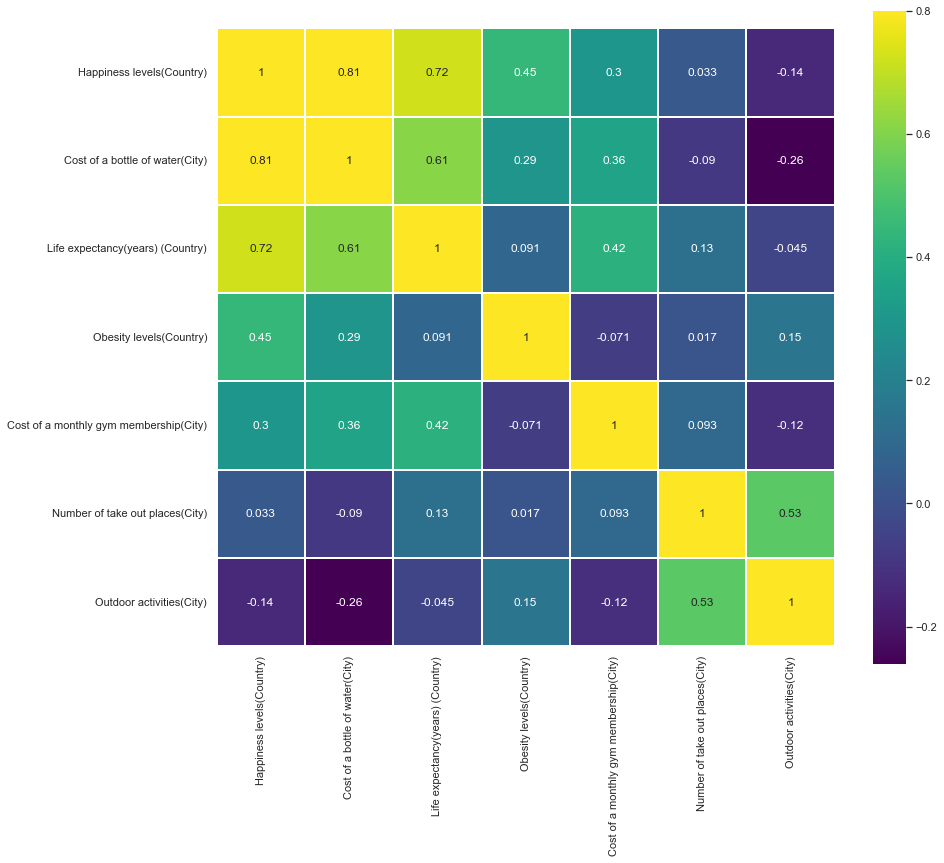

In [67]:
k= 7
cols = correlation.nlargest(k,'Happiness levels(Country)')['Happiness levels(Country)'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [68]:
y=train['Happiness levels(Country)']
train=train.drop(['Happiness levels(Country)'],axis=1)
train.fillna(train.mean(),inplace=True)
train.isnull().sum()

Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64